# Initial analysis

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

loc = '../antonsdata/'
df = pd.read_csv(loc+'df_bricks.csv',index_col=[0],decimal= ',',)
df.head()

,brick_nr,brick,life_expectancy (yrs),patients,population,patients_per_1000,longterm_disease_anddel,Andel med blodprop i hjertet,svaert_overvaegt Andel,uddannelse_lang antal,uddannelse_lang (value_per_1000),fravær,who_minimums_fysisk_aktivitet Andel
0,101,Bornholm,77.190500,2248.978472,33046,68.055997,0.406500,0.0205,0.175500,6035.258672,182.632048,6.286500,0.302000
1,102,Amager,79.967667,6136.772115,154254,39.783553,0.326667,0.0090,0.130333,64810.874712,420.156850,5.747333,0.243333
2,103,Nørrebro/City,79.283000,3019.148357,88293,34.194651,0.305000,0.0075,0.107500,44280.909321,501.522310,5.499500,0.221500
3,104,Vesterbro/Christianshavn,80.050000,3387.602593,103052,32.872750,0.307500,0.0080,0.100000,49553.419564,480.858397,5.580000,0.225000
4,105,Frederiksberg,79.645500,3574.931136,105260,33.962865,0.306000,0.0080,0.104000,52262.047446,496.504346,5.537500,0.223000


## corr

<AxesSubplot:>

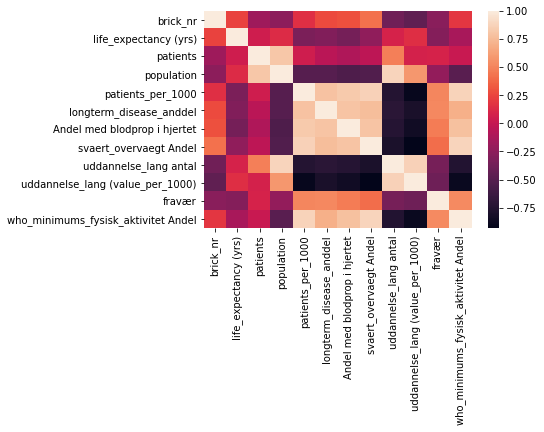

In [47]:
sns.heatmap(df.corr())

## Standard scaling

In [51]:
X = df.values[:,2:]
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

## PCA

[0.60762608 0.16424232]


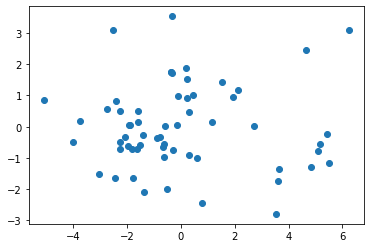

In [66]:
pca = PCA(n_components=2)
PCs = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)
plt.scatter(PCs[:,0],PCs[:,1])
plt.show()

## Regression

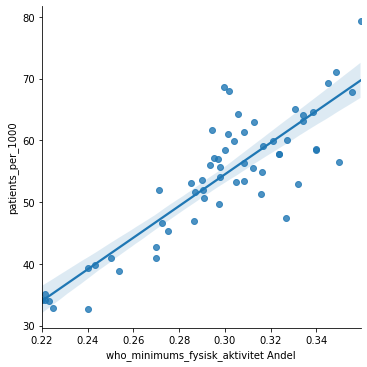

In [69]:
sns.lmplot(x='who_minimums_fysisk_aktivitet Andel',y='patients_per_1000', data=df)
plt.show()

## Clustering

In [70]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_scaled)
kmeans.labels_

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

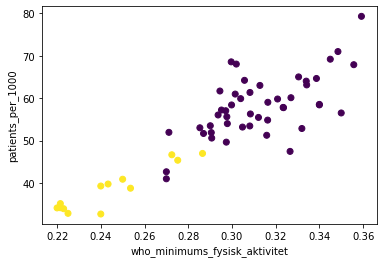

In [71]:
plt.scatter(df['who_minimums_fysisk_aktivitet Andel'],df['patients_per_1000'], c=kmeans.labels_)
plt.xlabel('who_minimums_fysisk_aktivitet')
plt.ylabel('patients_per_1000')
plt.show()

## Chloropleth